Student Performance Indicator  
* Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
1) Problem statement  
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection  
The data consists of 8 column and 1000 rows.  
2.1) Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

# Student performace indicator

In [3]:
print("Shree Ganesh")

Shree Ganesh


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv(r'data/stud.csv')
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [ ]:
df.shape

(1000, 8)

# Dataset information

In [26]:
find_unique = ['gender', 'race_ethnicity','parental_level_of_education','lunch','test_preparation_course']

for i in find_unique:
    print(f"'Unique values in each columns ': {df[i].unique()}")

'Unique values in each columns ': ['female' 'male']
'Unique values in each columns ': ['group B' 'group C' 'group A' 'group D' 'group E']
'Unique values in each columns ': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
'Unique values in each columns ': ['standard' 'free/reduced']
'Unique values in each columns ': ['none' 'completed']


In [33]:
find_unique = ['gender', 'race_ethnicity','parental_level_of_education','lunch','test_preparation_course']

val_counts = {i : df[i].value_counts() for i in find_unique}
print(val_counts)

{'gender': gender
female    518
male      482
Name: count, dtype: int64, 'race_ethnicity': race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64, 'parental_level_of_education': parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64, 'lunch': lunch
standard        645
free/reduced    355
Name: count, dtype: int64, 'test_preparation_course': test_preparation_course
none         642
completed    358
Name: count, dtype: int64}


* *Gender* -> 2 gender (male/female)  
* *Race/Ethinicity* -> 5 groups (group A/B/C/D/E)  
* *Parent level edu* ->  6 level (some collage/associate degree/high school/some high school/bachlor's degree/master's degree)  
* *Lunch* -> 2 types (standard/(free/reduced))  
* *Test preparation* -> 2 entries (none/completed)

# Data checks to perform
* Missing values
* Duplicates
* Data types
* Unique values in each columns
* Statastics of Dataset
* Types of categoris present in categorical column

**Null check**

In [34]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values

**Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values

**Check Data Types**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


info() shows the 'Dtypes' no. of non-null values also  
So this dataset has object (usually strings) and int64

**Number of unique values in each columne**

In [40]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

**Check statistics of dataset**

In [41]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* So their are 3 numerical features
* count : 1000 entries in each columns
* mean : all the means are very close bw 66 anf 68.06 so the avarege performance in each subject is identical
* standard deviation:  also have similar spread with writing been slighty more variable
* min: 0 in math shows extremely low score or test skips, possible an outlier cause mean in far from that
* 25% of student score lower then those marks ie this shows the lower end of upper end of 1st quantile
* max : At least one student achived full score in all subject

In [49]:
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical feature : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical feature : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Adding score for 'Total score' and 'Average'

In [ ]:
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total score']/3

In [ ]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [58]:
reading_full = df[df['math_score']==100]['math_score'].count()

print("Numeber of students wil full marks in maths :", reading_full)


Numeber of students wil full marks in maths : 7


# Exploring Data (Visualization)

* Visualise average score distibution to make some conclusion
* Kernal distrubution function (KDE)

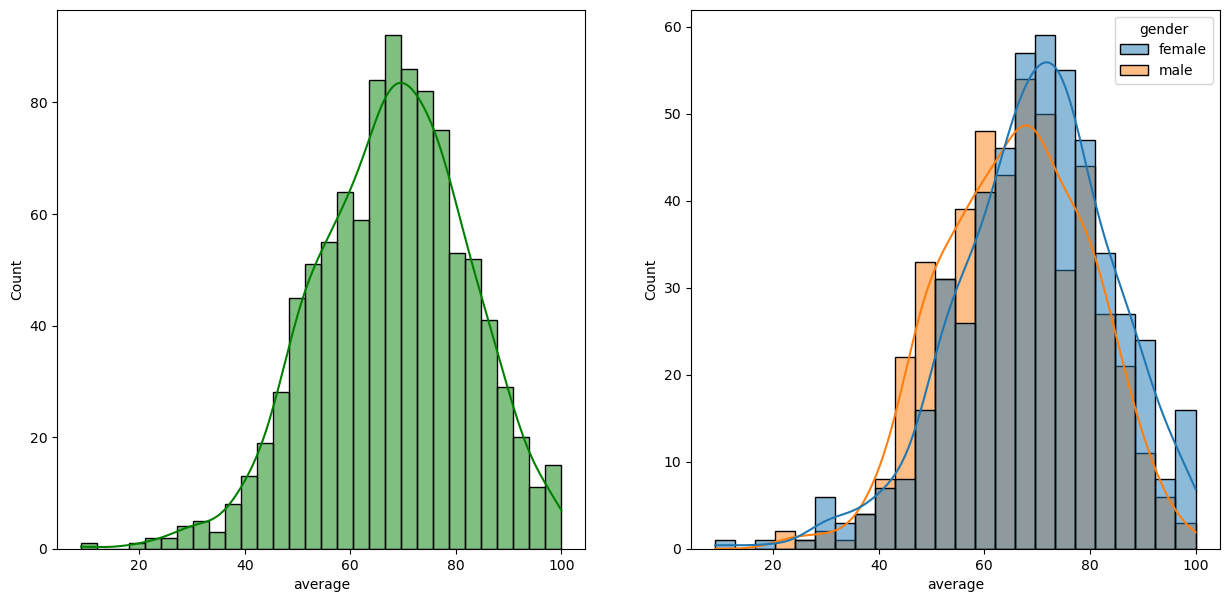

In [70]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
# 1 row and 2 columns (side by side image)
plt.subplot(121) # 1 row 2 column 1 subplot
sns.histplot(x='average', data=df, bins=30, kde=True , color='g')
plt.subplot(122)
sns.histplot(x='average', data=df, kde=True, hue='gender') #kde shos pdf instead of counts of hist bars
plt.show()